<a href="https://colab.research.google.com/github/OrJaku/chat-application/blob/master/digits_rec_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical
import numpy as np
import pandas as ps
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import os 

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/Handwritten_digital"

/content/drive/My Drive/Colab Notebooks/Handwritten_digital


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
(train_images_origin, train_labels_origin), (test_images_origin, test_labels_origin) = mnist.load_data()

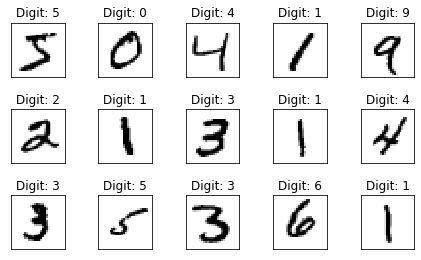

In [0]:
fig = plt.figure()
for i in range(3*5):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images_origin[i], cmap='gist_yarg')
  plt.title("Digit: {}".format(train_labels_origin[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [0]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = train_images.reshape((60000, 28*28))
test_images = train_images.astype("float32") / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
history = network.fit(
    train_images, 
    train_labels, 
    epochs=6, 
    batch_size=128, 
    verbose=2,
    validation_data=(train_images, train_labels))
save_file = 'data/'
model_name = 'model_mnist.h5'
model_path = os.path.join(save_file, model_name)
network.save(model_path)
print('Saved trained model at %s ' % model_path)

Train on 60000 samples, validate on 60000 samples
Epoch 1/6
 - 6s - loss: 0.1125 - acc: 0.9684 - val_loss: 0.1092 - val_acc: 0.9693
Epoch 2/6
 - 6s - loss: 0.1092 - acc: 0.9692 - val_loss: 0.1090 - val_acc: 0.9693
Epoch 3/6
 - 6s - loss: 0.1061 - acc: 0.9699 - val_loss: 0.1021 - val_acc: 0.9714
Epoch 4/6
 - 6s - loss: 0.1028 - acc: 0.9708 - val_loss: 0.1005 - val_acc: 0.9713
Epoch 5/6
 - 6s - loss: 0.1002 - acc: 0.9719 - val_loss: 0.0971 - val_acc: 0.9726
Epoch 6/6
 - 6s - loss: 0.0972 - acc: 0.9724 - val_loss: 0.0937 - val_acc: 0.9736
Saved trained model at data/model_mnist.h5 
